#   Olá mundo! 🌎  Seja muito bem vindo a resolução do  meu projeto.

-  Importando bibliotecas para a manipulação e visualização de dados, assim como para a importação do dataframe.

In [4]:
#visualização de dados.
import matplotlib.pyplot as plt
import seaborn as sns

#Manipulação e analise de dados.
import pandas as pd




In [5]:
#Carregando dataframe.
df= pd.read_excel("dados_comerciais.xlsx")

### Agora vamos para a segunda etapa, a exploração e análise dos dados!

-   Usando a função head, para  uma analise inicial das dez primeiras linhas.

In [6]:
#Dez primeiras linhas.
df.head(10)

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,Custo
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00,345
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00,712
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00,390
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32,200
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89,234
5,SKU-0000006,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Rodrigo Fagundes,1005,2012-05-04,590.98,90
6,SKU-0000007,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-06-04,1000.91,134
7,SKU-0000008,Geladeira Duplex,Eletrodomésticos,Doméstico,Electrolux,A9990,Belo Horizonte,Minas Gerais,Fernando Zambrini,1007,2012-07-04,1229.00,800
8,SKU-0000009,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-08-04,1300.00,400
9,SKU-0000010,Geladeira Duplex,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,André Pereira,1002,2012-09-04,1290.00,600


-  Valores nulos (null) podem ser muito problemáticos para uma análise de dados; no entanto, nesse caso, não temos nenhum.

In [7]:
#Função para checar a presença de valores nulos.
df.isnull().sum()

ID-Produto     0
Produto        0
Categoria      0
Segmento       0
Fabricante     0
Loja           0
Cidade         0
Estado         0
Vendedor       0
ID-Vendedor    0
Data Venda     0
ValorVenda     0
Custo          0
dtype: int64

- Solicitarei a execução da função 'info' para obter detalhes, como quantidade de linhas e colunas, tamanho dos arquivos e os tipos de dados inteiros(int), decimais(float64), data(datetime64), etc...).

In [8]:
#Função 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID-Produto   457 non-null    object        
 1   Produto      457 non-null    object        
 2   Categoria    457 non-null    object        
 3   Segmento     457 non-null    object        
 4   Fabricante   457 non-null    object        
 5   Loja         457 non-null    object        
 6   Cidade       457 non-null    object        
 7   Estado       457 non-null    object        
 8   Vendedor     457 non-null    object        
 9   ID-Vendedor  457 non-null    int64         
 10  Data Venda   457 non-null    datetime64[ns]
 11  ValorVenda   457 non-null    float64       
 12  Custo        457 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(9)
memory usage: 46.5+ KB


- Irei transformar o "custo" em valor decimal(float64). Isso simplificará a manipulação dos dados, considerando que estamos trabalhando com valores monetários.

In [9]:
#Função lambda, para conversão de int para float. 
df["Custo"] = df["Custo"].apply(lambda x: float(x))

#Checando se reconheceu como float 
df["Custo"].dtype

dtype('float64')

-  Criando uma coluna de Lucro para gerar uma de margem de lucro.

- Criando tabela de Margem de lucro em busca em busca de Insights.A margem de lucro serve para a empresa garantir se mantenha viável no longo prazo. Ela é fundamental na hora de formar o preço de venda do produto e deve balancear os custos de produção, resultados esperados pela empresa e o que o mercado está disposto a pagar.

In [10]:
#Tabela de lucro.
df["Lucro"] = df["ValorVenda"] - df["Custo"]

#Tabela de Margem de lucro
df["MargemdeLucro"]= df["Lucro"] / df["ValorVenda"] *100

#Visualizando as cinco primeiras linhas para observar a coluna lucro e Margem de Lucro.
df.head().round(2)

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,Custo,Lucro,MargemdeLucro
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00,345.0,334.00,49.19
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00,712.0,120.00,14.42
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00,390.0,400.00,50.63
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32,200.0,565.32,73.87
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89,234.0,225.89,49.12


- Vou checar os tipos de cada coluna criados, afim de verificar como foram reconhecidos.

In [12]:
#Dtype das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID-Produto     457 non-null    object        
 1   Produto        457 non-null    object        
 2   Categoria      457 non-null    object        
 3   Segmento       457 non-null    object        
 4   Fabricante     457 non-null    object        
 5   Loja           457 non-null    object        
 6   Cidade         457 non-null    object        
 7   Estado         457 non-null    object        
 8   Vendedor       457 non-null    object        
 9   ID-Vendedor    457 non-null    int64         
 10  Data Venda     457 non-null    datetime64[ns]
 11  ValorVenda     457 non-null    float64       
 12  Custo          457 non-null    float64       
 13  Lucro          457 non-null    float64       
 14  MargemdeLucro  457 non-null    float64       
dtypes: datetime64[ns](1), f

- Fornecendo estatísticas importantes, como média, desvio padrão, mínimo, máximo e quartis, para os valores de venda, custo e lucro.

Como podemos ver abaixo temos um desvio padrão muito alto na coluna de lucro e valor venda. Também temos um número negativo em "Lucro", duas situações perigosas...

In [13]:
#Função describe.
df[["ValorVenda","Custo", "Lucro", "MargemdeLucro"]].describe().round(2)

,ValorVenda,Custo,Lucro,MargemdeLucro
count,457.00,457.00,457.00,457.00
mean,786.23,132.75,653.49,60.44
std,754.38,83.52,752.57,55.75
min,12.00,90.00,-108.00,-900.00
25%,167.00,120.00,47.00,28.14
50%,671.00,120.00,500.98,78.84
75%,1230.00,120.00,1110.00,90.24
max,3999.00,800.00,3879.00,97.00


Produtos e suas margem de Lucro, confirmando ainda mais a informação anterior!

In [94]:
#groupby
df.groupby("Produto").agg({"MargemdeLucro": "mean", "ValorVenda": "mean"}).reset_index().sort_values(by="MargemdeLucro", ascending=False).round(2)


,Produto,MargemdeLucro,ValorVenda
16,Samsung Galaxy 8,96.79,3867.75
14,Notebook Dell 8 GB,90.63,1282.35
13,Morotola Moto G5,90.12,1218.62
0,Ar Condicionado,89.22,1217.17
3,Desktop HP 16 GB,89.02,1210.50
2,Desktop 32 GB,86.31,972.41
18,Sony Experia XA,82.83,699.00
6,Geladeira Duplex,82.69,1094.38
10,Lavadora 11 Kg,80.64,819.36
17,Secadora Vapor,77.14,664.68


- Com o gráfico de caixa, podemos ter uma análise mais profunda e com facil interpretação, visualização de dispersão, comparação de grupos e possíveis identificação de outliers.
- 1- Abaixo no gráfico de caixas podemos verificar que o custo de alguns produtos estão altos e desbalanceados. Uma indetificação mais preocupante ainda é que tem um ou mais produto abaixo da linha de zero em "Lucro".

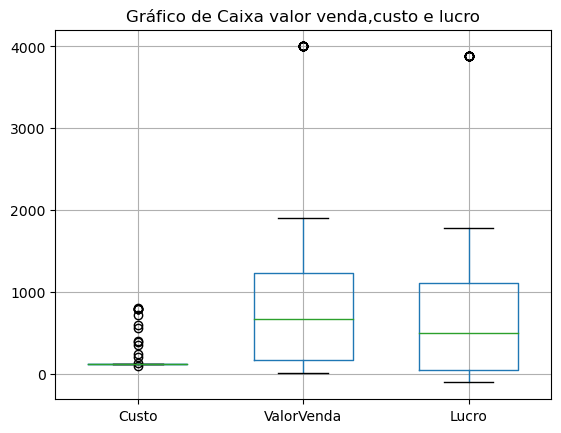

In [95]:
#Grafico de caixa com custo, valor venda e lucro
fig, ax = plt.subplots()
df.boxplot(column=["Custo", "ValorVenda", "Lucro"], positions=[1, 2, 3], widths=0.6, ax=ax)
#Título
ax.set_title("Gráfico de Caixa valor venda,custo e lucro")
#Plotar.
plt.show()

- 2- Abaixo podemos analisar que é apenas um produto cujo preço é mais alto em comparação aos outros produtos.

In [96]:
#Quantidade de possíveis anomalias e produtos com preço mais de 3500.
df[["Produto", "Lucro"]][lambda x: x['Lucro'] > 3500]

,Produto,Lucro
147,Samsung Galaxy 8,3879.0
150,Samsung Galaxy 8,3879.0
154,Samsung Galaxy 8,3879.0
156,Samsung Galaxy 8,3879.0
157,Samsung Galaxy 8,3879.0
158,Samsung Galaxy 8,3879.0
159,Samsung Galaxy 8,3879.0
169,Samsung Galaxy 8,3879.0
170,Samsung Galaxy 8,3879.0
171,Samsung Galaxy 8,3879.0


- Confirmando o prejuízo em um ou mais produtos.

In [97]:
#Função descritiva.
df[["ValorVenda","Custo", "MargemdeLucro"]].describe().round(2)

,ValorVenda,Custo,MargemdeLucro
count,457.00,457.00,457.00
mean,786.23,132.75,60.44
std,754.38,83.52,55.75
min,12.00,90.00,-900.00
25%,167.00,120.00,28.14
50%,671.00,120.00,78.84
75%,1230.00,120.00,90.24
max,3999.00,800.00,97.00


-  Ao codar o resumo estatístico (describe),podemos afirmar a observação acima!Observamos uma margem de lucro negativa.Logo abaixo verificamos que trata-se de apenas um produto."

In [98]:
#Indentificando números de prejuízos.
df["Lucro"][lambda x: x< 0]

433   -108.0
Name: Lucro, dtype: float64

- Outra função interessante usando lambda, mas com mais informações.

In [99]:
#Podendo indentificar o produto, fabricante, a loja, o vendedor, etc...Com função lambda.
df.apply(lambda row: row["Custo"] - row["ValorVenda"], axis=1)
prejuizos = df[df["MargemdeLucro"] < 0]
print(prejuizos)

      ID-Produto     Produto        Categoria   Segmento Fabricante   Loja  \
433  SKU-0000434  Ventilador  Eletroportáteis  Doméstico    Samsung  R1297   

         Cidade          Estado       Vendedor  ID-Vendedor Data Venda  \
433  Petrópolis  Rio de Janeiro  Artur Moreira         1004 2015-08-02   

     ValorVenda  Custo  Lucro  MargemdeLucro   Ano  Mes  
433        12.0  120.0 -108.0         -900.0  2015    8  


- Agora vamos examinar como estão as percentagens de lucro e custo.

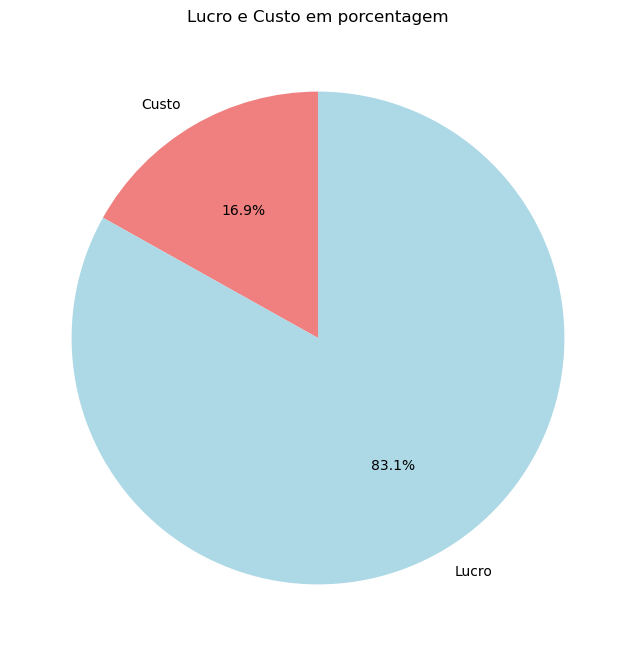

In [100]:
#Total de Valor venda, custo e  lucro.
totaldevendas=df[["Custo", "Lucro"]].sum()

#Tamanho da figura.
plt.figure(figsize=(12, 8))

#Grafico de pizza, labels, dados em porcentagem, angulo e cores.
plt.pie(totaldevendas, labels=totaldevendas.index, autopct='%1.1f%%', startangle=90, colors=["lightcoral", "lightblue", "lightgreen"])

#Título.
plt.title("Lucro e Custo em porcentagem")

#Mostra o gráfico.
plt.show()

- Analisando os total de venda por "Data Venda".

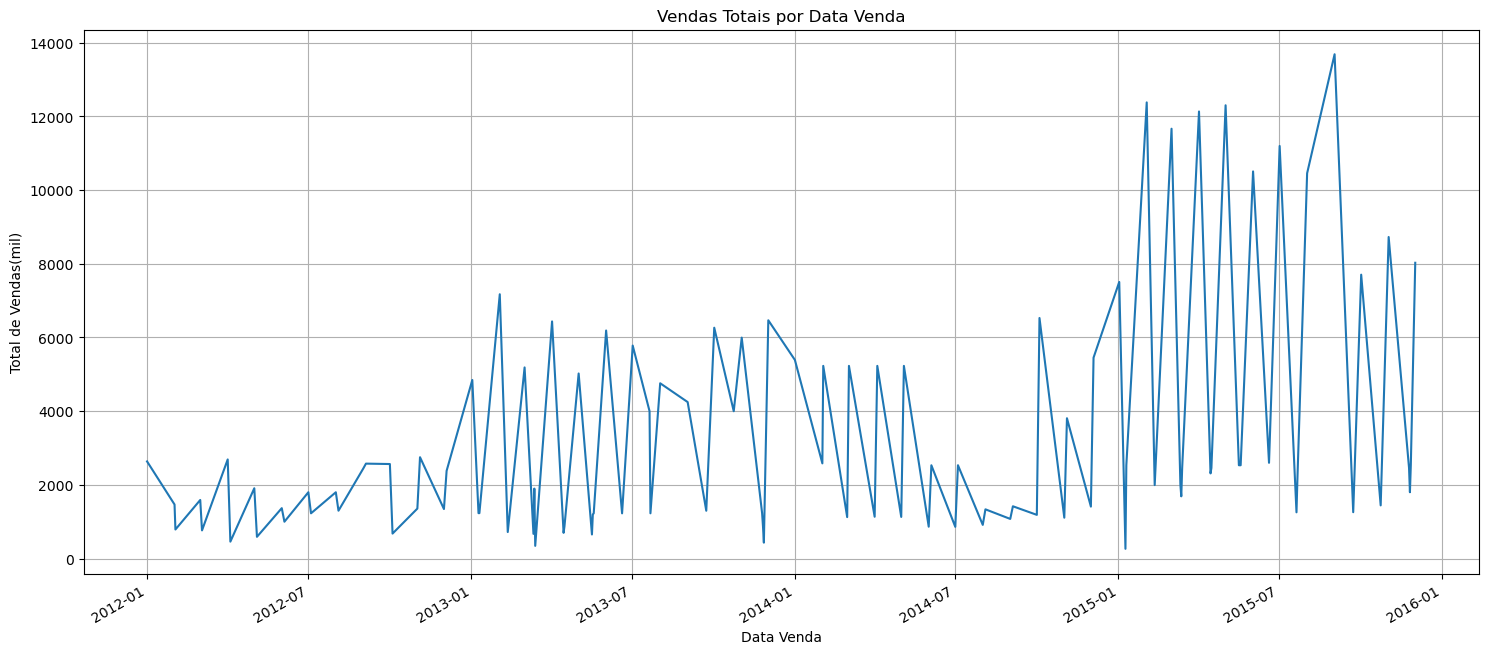

In [101]:
#DataFrame.
datavenda=df.groupby(["Data Venda"])["ValorVenda"].sum()

#Tamanho do gráfico.
plt.figure(figsize=(18, 8))

# Gráfico de linhas.
datavenda.plot()

#Labels.
plt.xlabel("Data Venda")
plt.ylabel("Total de Vendas(mil)")
plt.title("Vendas Totais por Data Venda")

#Grade.
plt.grid(True)

#Mostrar arquivo
plt.show()

- Verifique como não ficou tão bom visualmente, destacando a impotância para uma análise por ano e mês. Irei criar uma coluna com os anos e os meses separados de "data de venda".

In [102]:
#Elaborando uma coluna para o ano e o meses. 
df["Ano"] = df["Data Venda"].dt.year
df["Mes"] = df["Data Venda"].dt.month
#Verificando as colunas.
df.head().round(2)

,ID-Produto,Produto,Categoria,Segmento,Fabricante,Loja,Cidade,Estado,Vendedor,ID-Vendedor,Data Venda,ValorVenda,Custo,Lucro,MargemdeLucro,Ano,Mes
0,SKU-0000001,LG K10 TV Power,Celulares,Corporativo,LG,SP8821,São Paulo,São Paulo,Ana Teixeira,1009,2012-10-04,679.00,345.0,334.00,49.19,2012,10
1,SKU-0000002,Geladeira Duplex,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-01-01,832.00,712.0,120.00,14.42,2012,1
2,SKU-0000003,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Josias Silva,1006,2012-02-02,790.00,390.0,400.00,50.63,2012,2
3,SKU-0000004,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Brastemp,SP8821,São Paulo,São Paulo,Mateus Gonçalves,1003,2012-03-03,765.32,200.0,565.32,73.87,2012,3
4,SKU-0000005,Lavadora 11 Kg,Eletrodomésticos,Doméstico,Electrolux,SP8821,São Paulo,São Paulo,Artur Moreira,1004,2012-04-04,459.89,234.0,225.89,49.12,2012,4


- Podemos notar abaixo que tivemos uma baixa do ano 2013 para 2014 e uma boa recuperação em 2015.

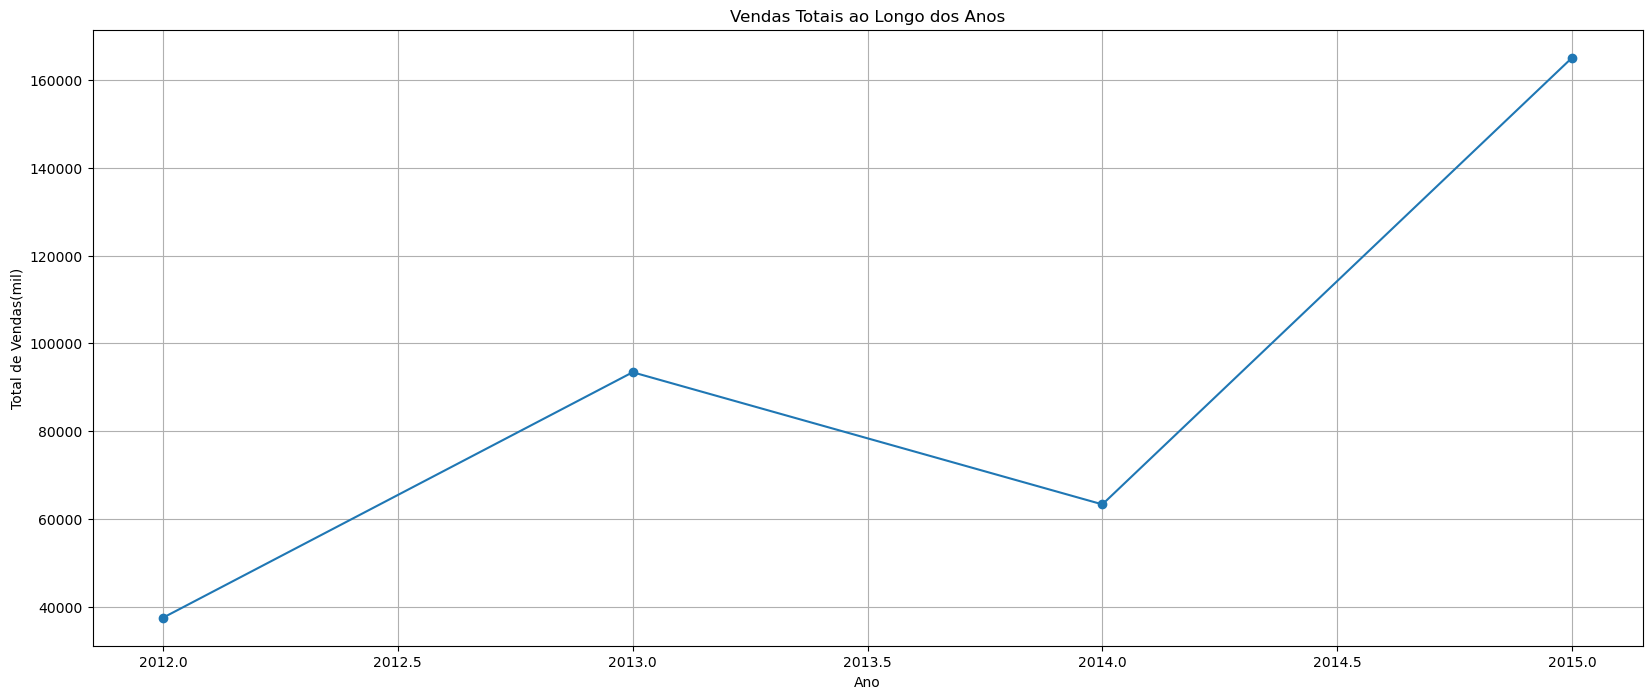

In [103]:
#DataFrame
ano=df.groupby(["Ano"])["ValorVenda"].sum()

#Tamanho do gráfico
plt.figure(figsize=(20, 8))

# Adicionei marcas para mostrar pontos no gráfico.
ano.plot(marker='o') 

#Labels
plt.xlabel("Ano")
plt.ylabel("Total de Vendas(mil)")
plt.title("Vendas Totais ao Longo dos Anos")
#Grade.
plt.grid(True)

#Mostrar arquivo
plt.show()

Não foram registradas vendas de eletrônicos e ouve uma queda da categoria com maior desempenho(Eletrodomésticos). Principalmente por esses fatores houve uma baixa em 2014, como podemos análisar no gráfico abaixo.

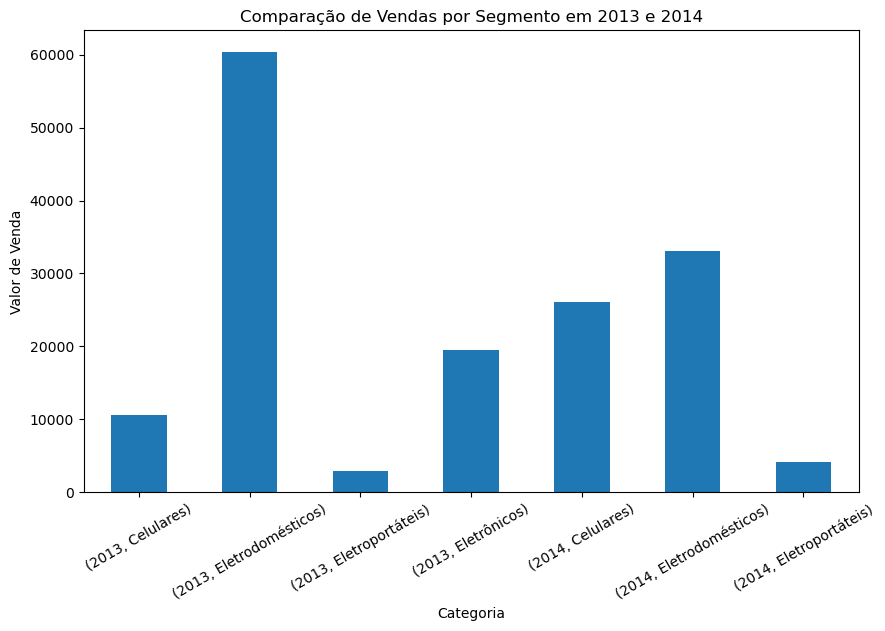

In [104]:
df_2013_2014 = df[df['Ano'].isin([2013, 2014])]
resultado = df_2013_2014.groupby(["Ano", "Categoria"])["ValorVenda"].sum()
resultado.plot(kind='bar', figsize=(10, 6))
plt.title("Comparação de Vendas por Segmento em 2013 e 2014")
plt.xlabel("Categoria")
plt.ylabel("Valor de Venda")
plt.xticks(rotation=30)
plt.show()

- Podemos observar que as vendas entre março e maio teve um bom desempenho, já agosto e dezembro as vendas preocupam. Uma queda preocupante.

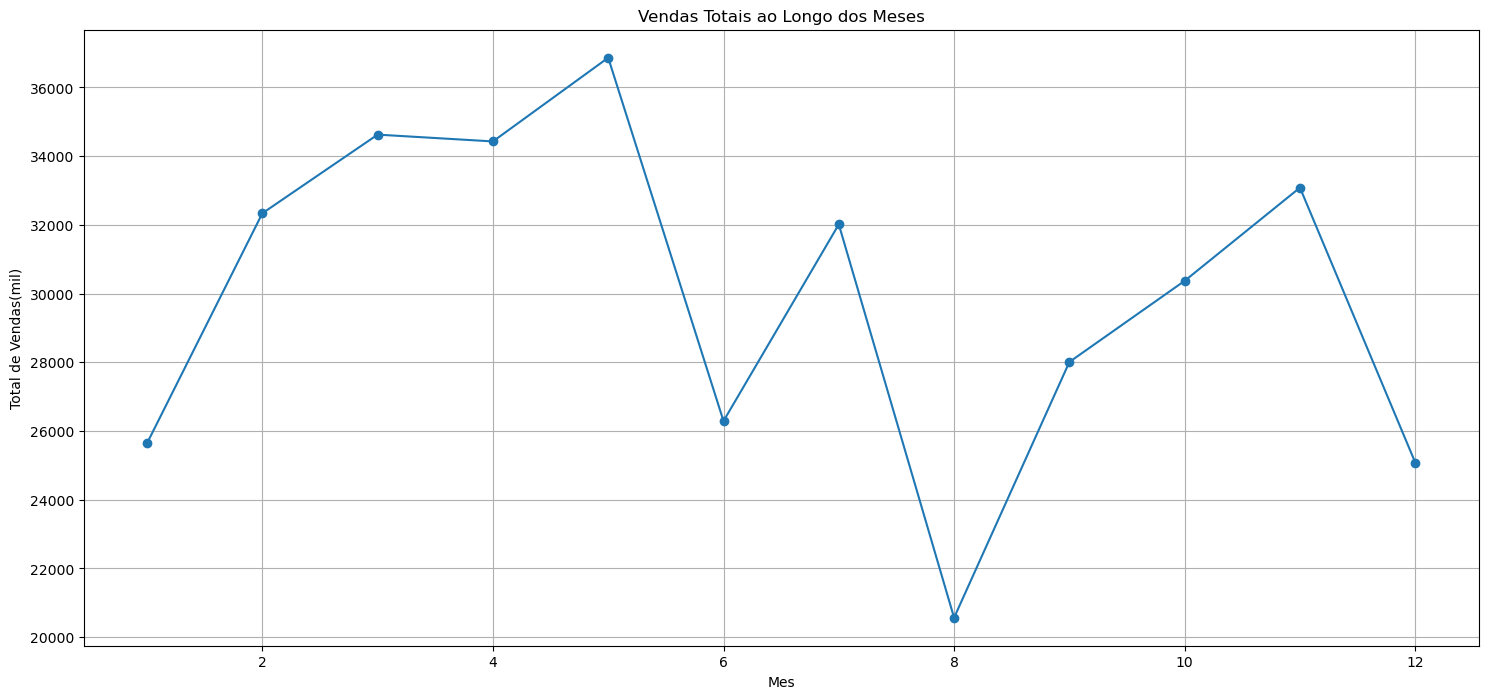

In [105]:
#DataFrame
mes=df.groupby(["Mes"])["ValorVenda"].sum()

#Tamanho do gráfico
plt.figure(figsize=(18, 8))

# Adicionei marcas para mostrar pontos no gráfico.
mes.plot(marker='o')  

#Labels
plt.xlabel("Mes")
plt.ylabel("Total de Vendas(mil)")
plt.title("Vendas Totais ao Longo dos Meses")
#Grade.
plt.grid(True)

#Mostrar arquivo
plt.show()

- Vendas de produtos por categoria

In [106]:
#Quantidade de vendas por Categoria
df["Categoria"].value_counts()

Categoria
Eletrodomésticos    226
Eletroportáteis     124
Eletrônicos          60
Celulares            47
Name: count, dtype: int64

- A média dos preços de celulares ao longo dos anos diminuíram ano a ano. Eletrônicos também caíram as médias dos valores, mas com uma queda de maior relevância.

In [107]:
#Agrupamento por ano, categoria e valor média de venda por produto.
df.groupby(["Ano","Categoria"])["ValorVenda"].mean().reset_index().sort_values(by = "ValorVenda",  ascending = False).round(2)

,Ano,Categoria,ValorVenda
3,2013,Celulares,2649.00
7,2014,Celulares,2614.50
10,2015,Celulares,1911.94
2,2012,Eletrônicos,1246.47
4,2013,Eletrodomésticos,887.66
11,2015,Eletrodomésticos,876.29
1,2012,Eletrodomésticos,841.04
6,2013,Eletrônicos,812.89
8,2014,Eletrodomésticos,769.86
0,2012,Celulares,679.00


- Preço total de venda por categoria, em ordem decrescente para melhor comparação.

In [108]:
#Agrupamento por ano, categoria e valor total de venda.
df.groupby(["Ano","Categoria"])["ValorVenda",].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).round(2)

,Ano,Categoria,ValorVenda
11,2015,Eletrodomésticos,77989.88
10,2015,Celulares,61182.00
4,2013,Eletrodomésticos,60361.13
8,2014,Eletrodomésticos,33104.02
7,2014,Celulares,26145.00
1,2012,Eletrodomésticos,21867.08
6,2013,Eletrônicos,19509.43
2,2012,Eletrônicos,14957.66
13,2015,Eletrônicos,13862.46
12,2015,Eletroportáteis,12030.45


- Com a análise, podemos notar que a categoria de celulares foi a que mais cresceu, atingindo um aumento de 8.910,60%.

In [109]:
#Calculando porcentagem de crescimento de vendas totai em celulares.
celulares=(61182-679) /679*100
print("Aumento percentual de: {:.2f}%".format(celulares))

Aumento percentual de: 8910.60%


* Já os eletrodomésticos tiveram uma queda em 2014 de 45,15%, levando em consideração o ano de 2013.

In [110]:
#Calculando a porcentagem de declínio nas vendas totais em eletrodomesticos
eletrodomesticos=(33.10402-60.36113) /60.36113*100
print("Diminuição percetual de: {:.2f}%".format(eletrodomesticos))

Diminuição percetual de: -45.16%


- Criando um gráfico, para melhor visualização das vendas totais por categorias.

- A categoria de eletrodomésticos representa mais de 53% das vendas, mesmo com a queda nas vendas ao longo dos anos.

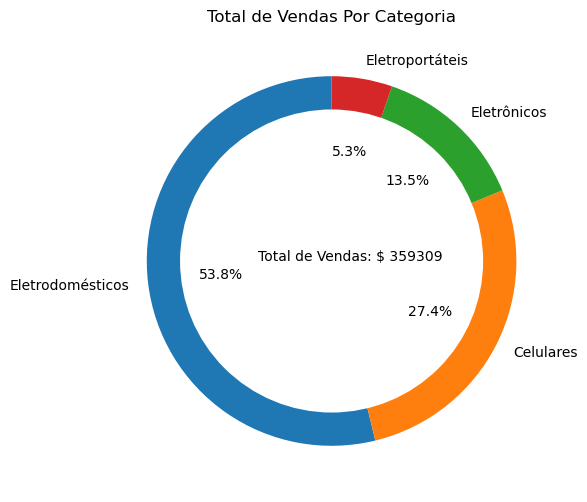

In [111]:
#Agrupando em um novo dataframe para criar um grafico e analisar as vendas totais ao longo do tempo registrado nas categorias.
rosca = df.groupby("Categoria")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False) 
# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza, labels, colocando a porcentagem nas categorias e o angulo.
plt.pie(rosca["ValorVenda"], 
        labels = rosca["Categoria"],
        autopct='%.1f%%', startangle = 90)

#Limpando o círculo central, com um espaço em branco, para criar a aparência de uma rosca.
centre_circle = plt.Circle((0, 0), 0.82, fc = "white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Título e subtítulo.
plt.annotate(text = "Total de Vendas: " + "$ " + str(int(sum(rosca["ValorVenda"]))), xy = (-0.40, 0))         #Esse codigo parece complicado, mas é só o subtítulo que vai aparecer no meio do gráfico com valor total de vendas e a posição.
plt.title("Total de Vendas Por Categoria")

#Mostrar gráfico.
plt.show()

- Podemos notar como as vendas de Eletroportáteis estão baixas, vamos ver como estão as margem de lucro!

- Aqui vemos como a margem de lucro dos Eletroportáteis estão abaixo dos demais produtos.

In [112]:
df.groupby("Categoria")["MargemdeLucro",].mean().reset_index().sort_values(by = "MargemdeLucro",  ascending = False).round(2)

,Categoria,MargemdeLucro
0,Celulares,91.37
3,Eletrônicos,81.14
1,Eletrodomésticos,76.56
2,Eletroportáteis,9.32


- Ainda investigando, podemos observar que nesta empresa não trabalham tanto com LG e Sony na categoria de celulares ou não são atrativos o bastante. No entanto, nos eletrodomésticos, Brastemp e Consul se destacam de forma positiva nas vendas.


* Já nos eletrônicos temos o destaque da HP.

In [113]:
df.groupby(["Categoria" ,"Fabricante"])["ValorVenda"].agg({"sum"})

sum
Categoria        Fabricante          
Celulares        LG            679.00
                 Motorola    35340.00
                 Samsung     61884.00
                 Sony          699.00
Eletrodomésticos Brastemp    92786.30
                 Consul      58897.22
                 Electrolux   6690.02
                 LG           7567.57
                 Panasonic   12775.00
                 Samsung     14606.00
Eletroportáteis  Britânia    10373.45
                 LG           2436.00
                 Samsung      6246.00
Eletrônicos      Dell        12823.54
                 Epson        7872.46
                 HP          18285.44
                 Sony         9348.11

- Analisando a quantidade de produtos vendidos por fabricante.

In [148]:
#Quantidade de vendas por fabricante
df["Fabricante"].value_counts()

Fabricante
Brastemp      90
Consul        82
Samsung       74
Britânia      61
HP            29
Motorola      29
LG            27
Panasonic     26
Epson         12
Dell          10
Sony          10
Electrolux     7
Name: count, dtype: int64

- Grafico de barras, para visualizar a média de venda por produto para cada fabricante.

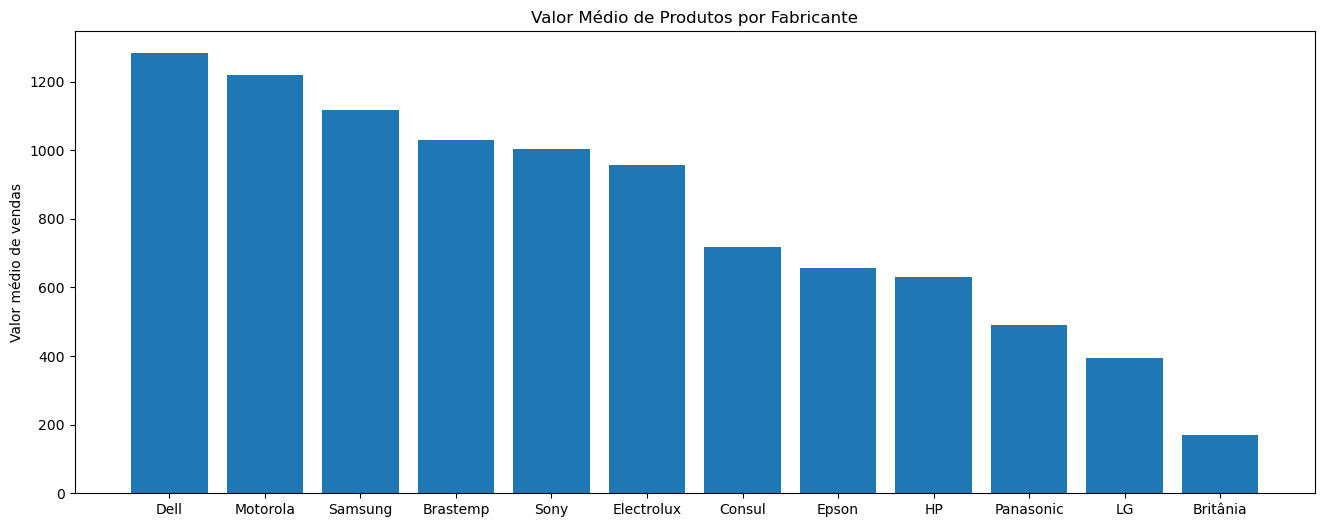

In [149]:
#Odenando um dataframe para criar um grafico de barras.
barras= df.groupby("Fabricante")["ValorVenda"].mean().reset_index().sort_values(by = "ValorVenda",  ascending = False)

#Tamanho da figura.
plt.figure(figsize = (16, 6))   

#Gráfico de barras
plt.bar(barras["Fabricante"], barras["ValorVenda"])

#Titulo y e título príncipal
plt.ylabel("Valor médio de vendas")
plt.title("Valor Médio de Produtos por Fabricante")

#Mostrar gráfico.
plt.show()

- Checando a quantidade de produtos vendidos por segmento.

- Informações sobre o valor médio de produtos por categoria em anos, apresentadas em ordem decrescente para facilitar a análise.

In [150]:
#Agrupando.
df.groupby(["Ano","Segmento"])["ValorVenda",].mean().reset_index().sort_values(by = "ValorVenda",  ascending = False).round(2)

,Ano,Segmento,ValorVenda
6,2014,Corporativo,3999.00
8,2015,Corporativo,3999.00
3,2013,Corporativo,1488.60
5,2013,Industrial,1291.20
0,2012,Corporativo,1202.82
10,2015,Industrial,1128.00
1,2012,Doméstico,856.32
4,2013,Doméstico,680.35
7,2014,Doméstico,601.76
9,2015,Doméstico,598.28


- Visualizando o total de vendas por seguimentos,

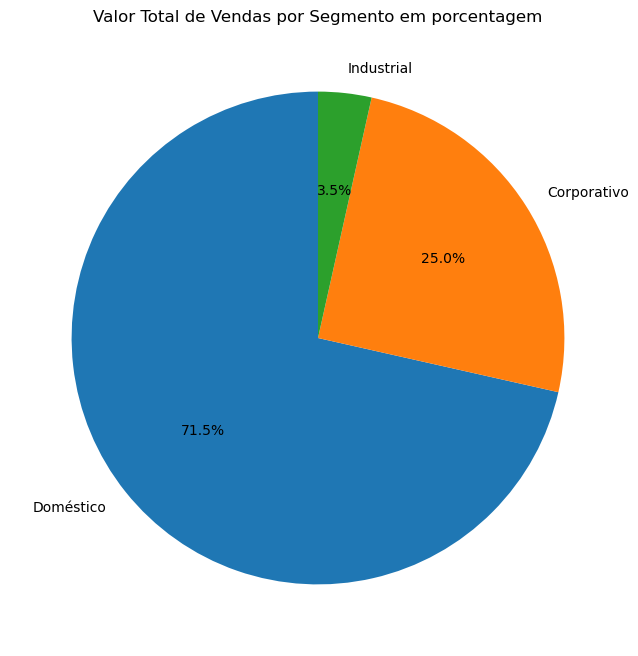

In [151]:
# criando dataframe
pizza = df.groupby("Segmento")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

#Tamanho da figura.
plt.figure(figsize = (15, 8))

#Gráfico de pizza.
plt.pie(pizza["ValorVenda"], 
        labels = pizza["Segmento"],
        autopct='%.1f%%', startangle = 90)
#Título de mostrar gráfico.
plt.title("Valor Total de Vendas por Segmento em porcentagem")
plt.show()       

- As sete lojas com melhores desempenhos em vendas da empresa.

In [152]:
#Ordenando com agrupamento.
df.groupby("Loja")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).head(7)

,Loja,ValorVenda
11,SP8822,87888.88
5,R1296,50843.66
4,R1295,48905.90
10,SP8821,39292.99
12,SP8823,35903.69
0,A9990,28282.87
13,V7654,24803.77


- As sete lojas com piores desempenhos em vendas da empresa.

In [153]:
#Ordenando com agrupamento.
df.groupby("Loja")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).tail(7)

,Loja,ValorVenda
8,S6543,12621.00
1,A9991,10016.00
2,B7659,7998.00
7,R1298,5031.00
9,SA7761,2940.00
6,R1297,2515.45
3,P0761,2265.90


- Quantidades de vendas anuais por cidade.

In [155]:
#Agrupando por ano e cidade para o valor venda.
df.groupby(["Ano", "Cidade"])["ValorVenda"].sum()

Ano   Cidade        
2012  Belo Horizonte     5445.87
      Rio de Janeiro     5025.89
      São Paulo         23874.21
      Vitória            3157.77
2013  Belo Horizonte    16610.00
      Cascavel           1263.90
      Rio de Janeiro     3860.00
      Salvador           2698.00
      São Paulo         56009.66
      Vitória           12977.00
2014  Belo Horizonte     2599.00
      Campos              149.00
      Petrópolis          614.00
      Rio de Janeiro    27469.90
      São Paulo         32023.12
      Vitória             467.00
2015  Belo Horizonte    13644.00
      Campinas           7998.00
      Campos             4882.00
      Cascavel           1002.00
      Osasco            12621.00
      Petrópolis         1901.45
      Rio de Janeiro    63393.77
      Salvador            242.00
      São Paulo         51178.57
      Vitória            8202.00
Name: ValorVenda, dtype: float64

- Valor de venda totais por cidade

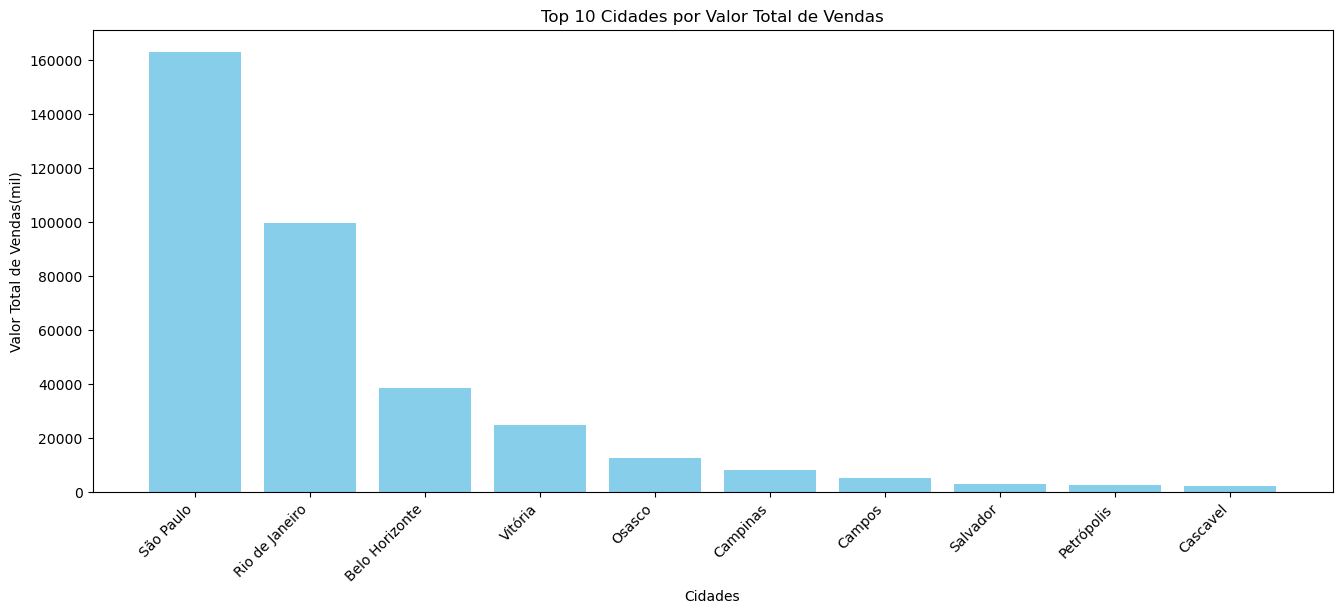

In [156]:
dfcidades=df.groupby("Cidade")["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False).head(10) 

#Tamanho da figura.
plt.figure(figsize=(16, 6))  # Ajusta o tamanho da figura conforme necessário

#Gráfico de barras com cor.
plt.bar(dfcidades["Cidade"], dfcidades["ValorVenda"], color='skyblue')
plt.xticks(rotation=45, ha="right")  # Rotaciona os rótulos do eixo X para melhor legibilidade

#Labels e titulo
plt.xlabel("Cidades")
plt.ylabel("Valor Total de Vendas(mil)")
plt.title("Top 10 Cidades por Valor Total de Vendas")
plt.show()

- Produtos mais vendidos

In [157]:
df["Produto"].value_counts()

Produto
Geladeira Duplex            110
Aspirador                    61
Micro-Ondas                  56
Impressora Deskjet           36
Morotola Moto G5             29
Ventilador                   22
Fritadeira                   20
Lavadora 11 Kg               16
Samsung Galaxy 8             16
Processador de Alimentos     13
Ar Condicionado              12
Secadora Vapor               12
Forno-Micro-Ondas            11
Notebook Dell 8 GB           10
Desktop 32 GB                10
Grill                         9
Liquidificador                8
Desktop HP 16 GB              4
Sony Experia XA               1
LG K10 TV Power               1
Name: count, dtype: int64

- Maiores vendas de produtos em 2012.

In [158]:
#2012
df_2012 = df[df["Ano"] == 2012]
df_2012.groupby(["Ano", "Produto"])["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

,Ano,Produto,ValorVenda
7,2012,Notebook Dell 8 GB,12823.54
2,2012,Geladeira Duplex,12070.89
6,2012,Micro-Ondas,5611.00
5,2012,Lavadora 11 Kg,2606.19
0,2012,Desktop 32 GB,2134.12
1,2012,Forno-Micro-Ondas,1345.00
4,2012,LG K10 TV Power,679.00
3,2012,Grill,234.00


- Notebook Delll de 8GB teve uma uma queda muito grande, não aparecendo nem entre as 14 principais vendas do ano de 2013.

- Já a Geladeira Duplex aumentou as vendas em aproximadamente 146.59% como podemos ver abaixo.

In [159]:
#Calculando porcentagem.
geladeiraduplex=(29765.56-12070.89) /12070.89*100
print("Aumento percentual de vendas da Geladeira Duplex de 2012 para 2013 foi de: {:.2f}%".format(geladeiraduplex))

Aumento percentual de vendas da Geladeira Duplex de 2012 para 2013 foi de: 146.59%


In [160]:
#2013.
df_2013 = df[df["Ano"] == 2013]
df_2013.groupby(["Ano", "Produto"])["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

,Ano,Produto,ValorVenda
6,2013,Geladeira Duplex,29765.56
9,2013,Lavadora 11 Kg,10503.57
11,2013,Samsung Galaxy 8,9897.00
12,2013,Secadora Vapor,7976.11
2,2013,Desktop 32 GB,7589.99
8,2013,Impressora Deskjet,7077.44
0,2013,Ar Condicionado,6456.00
3,2013,Desktop HP 16 GB,4842.00
4,2013,Forno-Micro-Ondas,3037.89
1,2013,Aspirador,2655.00


- A venda de Geladeira Duplex teve uma queda em relação a 2013, enquanto as vendas de Samsung Galaxy 8  teve um aumento considerável no mesmo período de 102,03%.

In [161]:
#Calculando porcentagem.
celulargalaxy=(19995.00-9897.00) /9897.00*100
print("Aumento percentual de vendas de Samsgung Galaxy 8 foi de: {:.2f}%".format(celulargalaxy))

Aumento percentual de vendas de Samsgung Galaxy 8 foi de: 102.03%


In [162]:
#2014.
df_2014 = df[df["Ano"] == 2014]
df_2014.groupby(["Ano", "Produto"])["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

,Ano,Produto,ValorVenda
3,2014,Geladeira Duplex,23503.00
8,2014,Samsung Galaxy 8,19995.00
5,2014,Micro-Ondas,6195.12
6,2014,Morotola Moto G5,6150.00
0,2014,Aspirador,3013.00
1,2014,Forno-Micro-Ondas,2217.90
4,2014,Grill,1188.00
2,2014,Fritadeira,911.00
7,2014,Processador de Alimentos,149.00


- Geladeira Duplex continua como um bom destaque 

In [163]:
geladeiraduplex2015=(55042.87-23503.00) /23503.007*100
print("Aumento percentual de vendas da Geladeira Duplex de 2012 para 2013 foi de: {:.2f}%".format(geladeiraduplex2015))

Aumento percentual de vendas da Geladeira Duplex de 2012 para 2013 foi de: 134.20%


In [164]:
#2015.
df_2015 = df[df["Ano"] == 2015]
df_2015.groupby(["Ano", "Produto"])["ValorVenda"].sum().reset_index().sort_values(by = "ValorVenda",  ascending = False)

,Ano,Produto,ValorVenda
3,2015,Geladeira Duplex,55042.87
9,2015,Samsung Galaxy 8,31992.00
7,2015,Morotola Moto G5,29190.00
6,2015,Micro-Ondas,14797.01
4,2015,Impressora Deskjet,13862.46
0,2015,Ar Condicionado,8150.00
1,2015,Aspirador,4705.45
10,2015,Ventilador,2934.00
8,2015,Processador de Alimentos,1788.00
2,2015,Fritadeira,1467.00


# Conclusão

### Após uma análise é evidente que medidas urgentes e estratégicas são necessárias para garantir sua sustentabilidade e crescimento futuro.

### Primeiramente, a presença de produtos com prejuízo indica uma falha na gestão de margens de lucro e uma possível necessidade de reavaliação dos preços de venda. Uma revisão completa da estrutura de custos e uma análise minuciosa da concorrência são essenciais para corrigir essa questão e garantir que a empresa alcance uma margem de lucro saudável em seus produtos. A queda nas vendas de produtos eletrônicos e eletroportáteis indica uma necessidade urgente de reavaliação das estratégias de marketing e oferta de produtos nesses segmentos. 

### Por fim, a queda nas vendas em 2014 destaca a importância de uma análise aprofundada das condições econômicas, mudanças nas tendências do mercado, possíveis falhas internas na estratégia de negócios e coleta de dados. A empresa deve buscar insights valiosos desses dados e estoque para informar decisões futuras e implementar medidas corretivas eficazes.



&nbsp;

# ![Varejo](https://img.freepik.com/fotos-premium/empresario-mostrando-a-evolucao-dos-negocios-com-um-grafico_1057126-157.jpg?w=1800)